In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup plotting style
sns.set(style='whitegrid')
%matplotlib inline


In [6]:


# Load all cleaned version of CSVs
df_fact = pd.read_csv("cleaned_fact.csv", low_memory=False)
df_customer= pd.read_csv("cleaned_customer.csv")
df_item = pd.read_csv("cleaned_item.csv")
df_store = pd.read_csv("cleaned_store.csv")
df_time = pd.read_csv("cleaned_time.csv")
df_trans = pd.read_csv("cleaned_trans.csv")


In [8]:
# Merge all tables into one
df = df_fact.merge(df_customer, on='customer_key', how='left') \
         .merge(df_item, on='item_key', how='left') \
         .merge(df_store, on='store_key', how='left') \
         .merge(df_time, on='time_key', how='left') \
         .merge(df_trans, on='payment_key', how='left')


### Key Performance Metrics (KPI)

In [11]:
# Total sales

In [16]:
total_sales = df['total_price'].sum()
print (total_sales)

105024137.75


In [13]:
# Average order value (aov)

In [15]:
aov = df.groupby('customer_key')['total_price'].sum().mean()
print(aov)

11426.845582635187


## Top-Performing Products

In [ ]:
### TOp 10 product based moving(quantity)

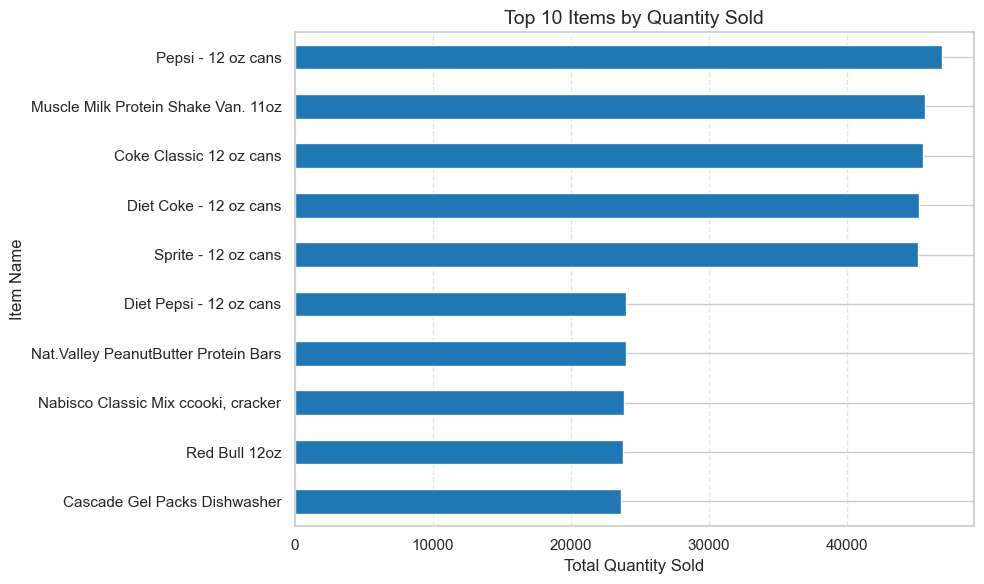

In [19]:

# Group by item and sum quantities
top_items = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_items.plot(kind='barh', color='#1f77b4')

# Customize
plt.title('Top 10 Items by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.gca().invert_yaxis()  # Show highest on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [21]:
### TOp 10 product by sales

C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


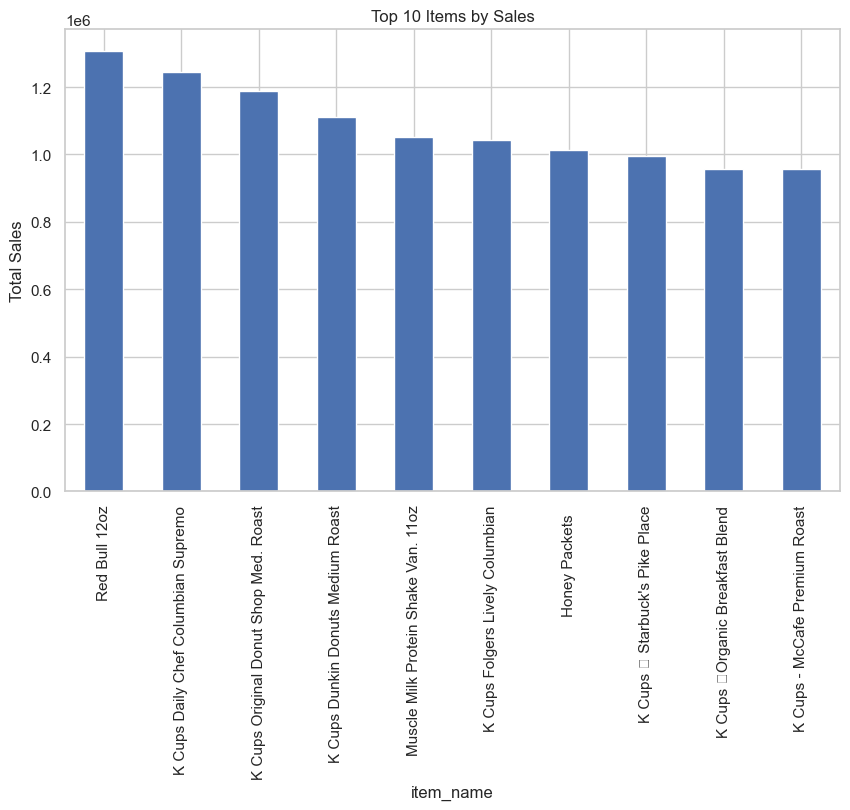

In [20]:
top_items = df.groupby('item_name')['total_price'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(10, 6), title='Top 10 Items by Sales')
plt.ylabel('Total Sales')
plt.show()


## Top customers

In [ ]:
#Top 10 customers

In [40]:


# Group by customer and calculate total sales
top_customers = df.groupby("firstname")["total_price"].sum().reset_index()

# Sort the customers by total sales in descending order
top_customers = top_customers.sort_values(by="total_price", ascending=False)

# Show the top 10 customers
top_10_customers = top_customers.head(10)

# Display result
print(top_10_customers)


     firstname  total_price
2144       smt   3748900.75
1478     pooja   2624685.50
804      jyoti   1592486.50
2255    sunita   1221333.75
1321      neha   1220306.00
952     kumari   1113005.00
1973     seema   1065939.50
1481    poonam   1049728.25
1523  priyanka    999280.25
2232     suman    921847.50


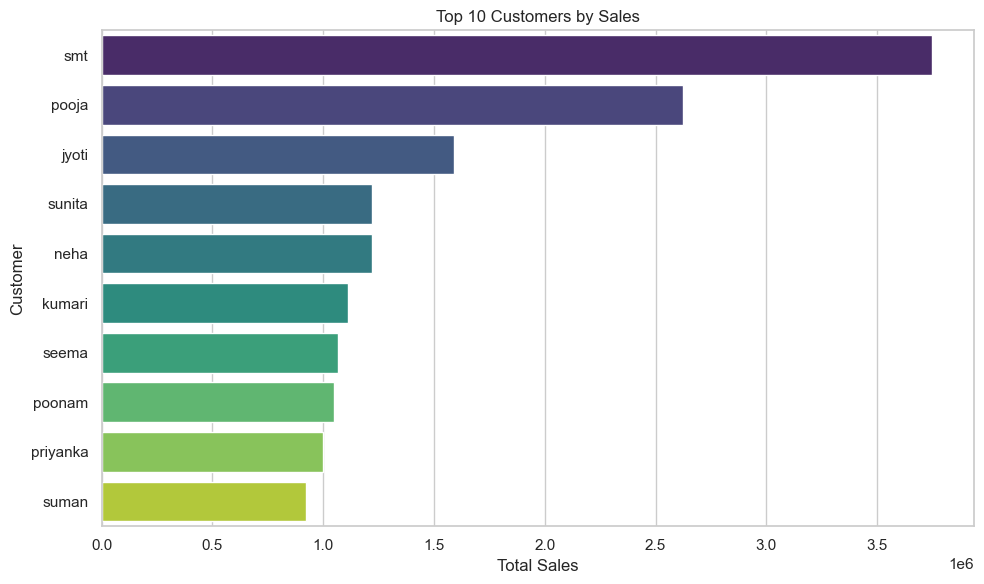

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_customers, x="total_price", y="firstname", palette="viridis")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


##  Sales by payment method

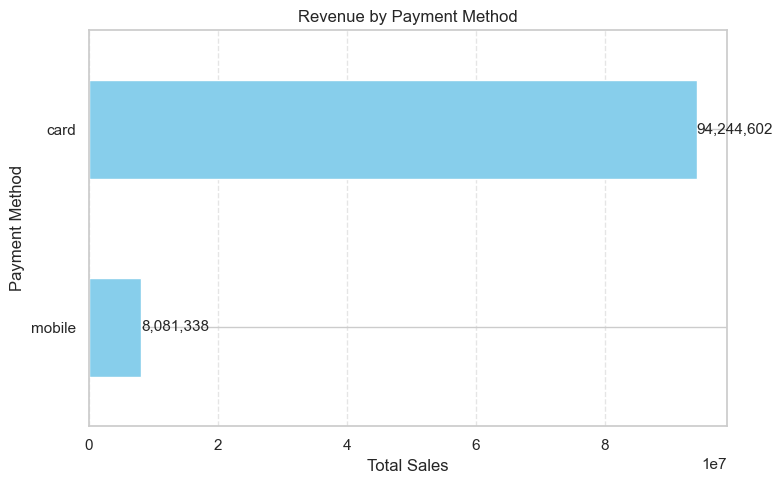

In [64]:
import matplotlib.pyplot as plt

# Group and sort
payment_rev = df.groupby('trans_type')['total_price'].sum().sort_values()

# Plot horizontal bar chart
ax = payment_rev.plot(kind='barh', color='skyblue', figsize=(8, 5), title='Revenue by Payment Method')

# Add value labels to the right of each bar
for i, v in enumerate(payment_rev):
    ax.text(v + 10000, i, f'{v:,.0f}', va='center', fontsize=11)

plt.xlabel("Total Sales")
plt.ylabel("Payment Method")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 ## Year, Month, Hours Patterns by sales

In [24]:
#sale by year

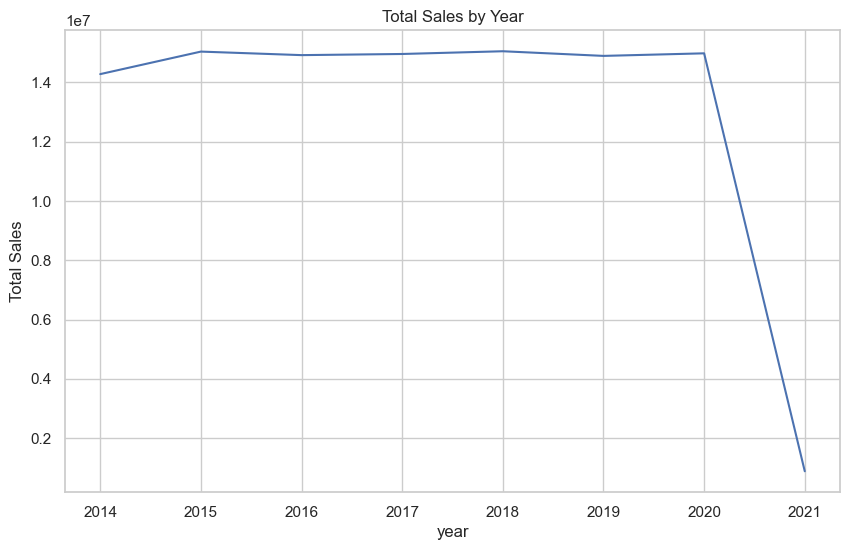

In [25]:
# Total Sales by Year
df.groupby('year')['total_price'].sum().plot(kind='line', figsize=(10, 6), title='Total Sales by Year')
plt.ylabel('Total Sales')
plt.show()



In [27]:
#sales by month

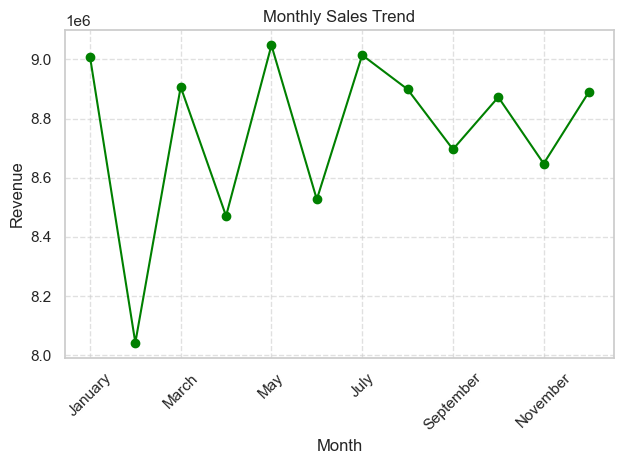

In [29]:
import calendar
import matplotlib.pyplot as plt

# Convert numeric month to month name
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[int(x)])

# Group and sort by month order
monthly = df.groupby('month_name')['total_price'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
monthly.plot(kind='line', marker='o', color='green', title='Monthly Sales Trend')
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [33]:
# hourly sales trend

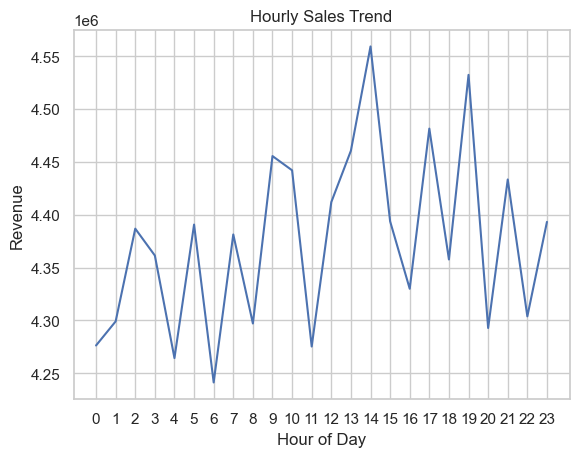

In [34]:
hourly_sales = df.groupby('hour')['total_price'].sum()
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.xticks(range(0, 24))
plt.show()


In [ ]:
#sales by region


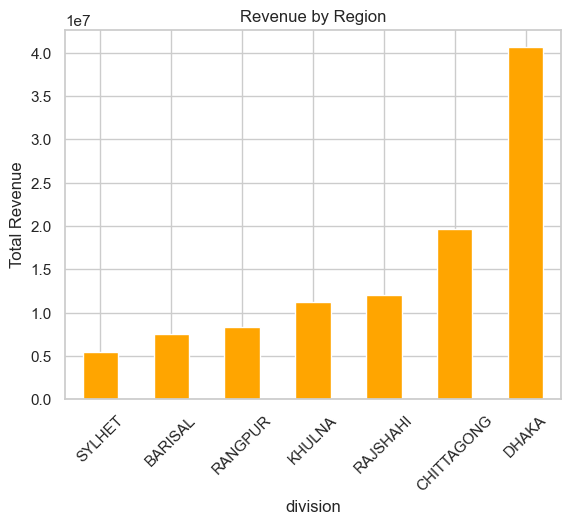

In [57]:
region_rev = df.groupby('division')['total_price'].sum().sort_values()
region_rev.plot(kind='bar', color='orange', title='Revenue by Region')
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [58]:
# Count unique stores in each division
stores_per_region = df.groupby('division')['store_key'].nunique().sort_values(ascending=False)

# Display the count
print(stores_per_region)


division
DHAKA         280
CHITTAGONG    136
RAJSHAHI       84
KHULNA         78
RANGPUR        58
BARISAL        52
SYLHET         38
Name: store_key, dtype: int64


## Store Distribution by Region (Count and Percentage)

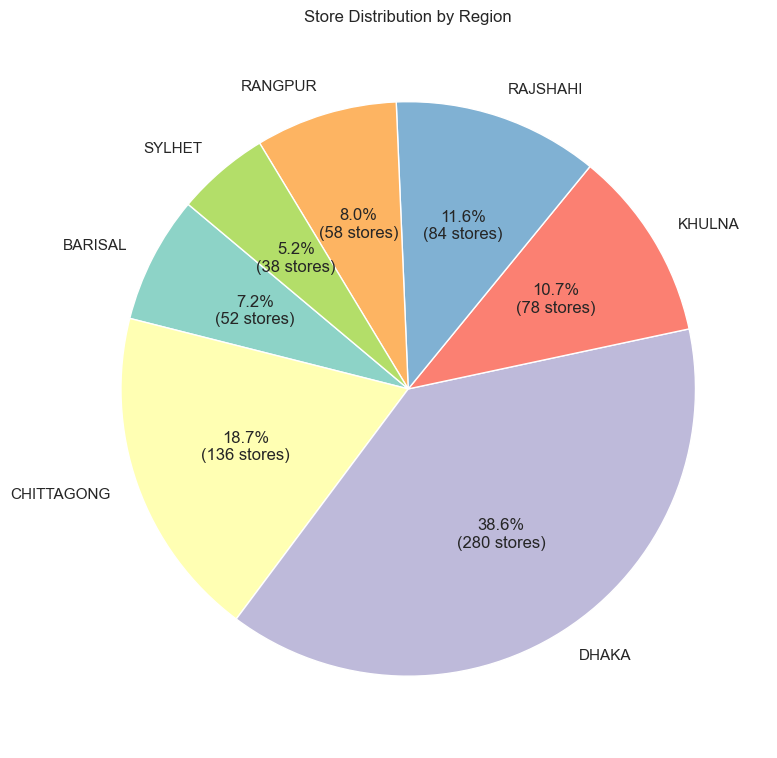

In [63]:

# Count unique stores in each region
stores_per_region = df.groupby('division')['store_key'].nunique()

# Custom label function to show count and percentage
def format_label(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute} stores)"

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    stores_per_region,
    labels=stores_per_region.index,
    autopct=lambda pct: format_label(pct, stores_per_region),
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Store Distribution by Region')
plt.tight_layout()
plt.show()


## Bank-Specific Sales
### Which banks handle the most transactions?

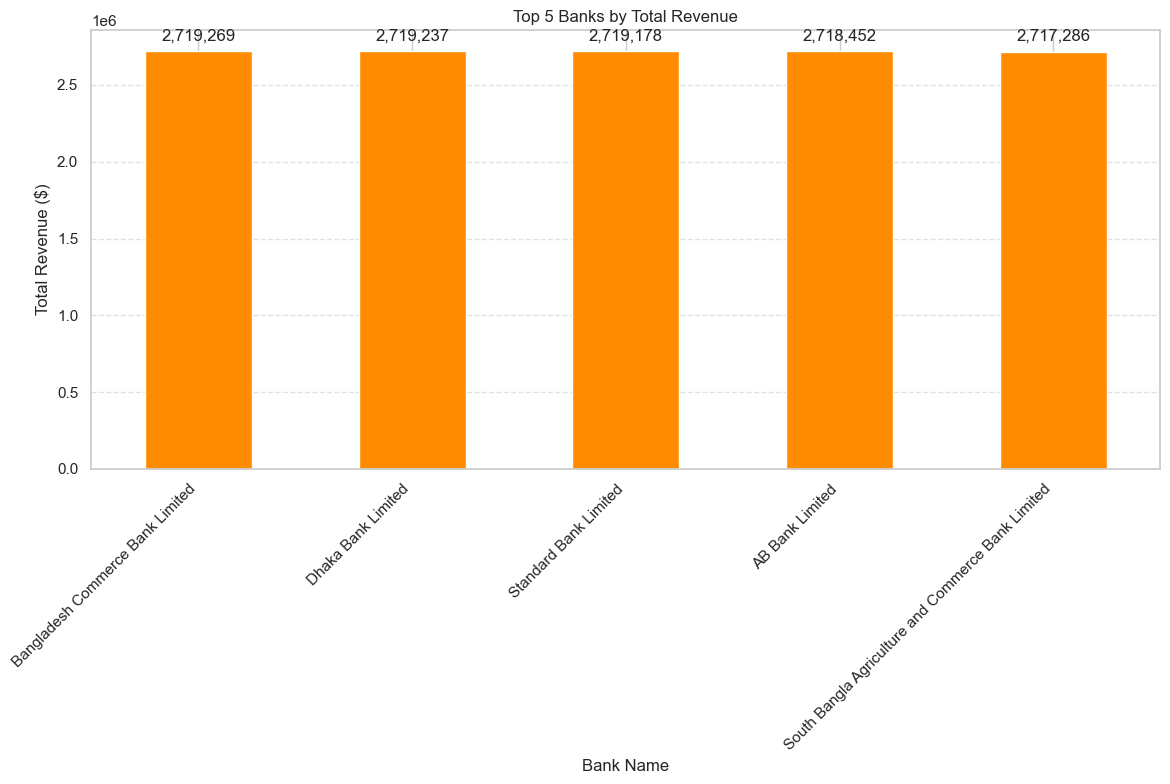

In [56]:
# Group by bank and sum total revenue, then select top 5
top_5_banks = df.groupby('bank_name')['total_price'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 8))
ax = top_5_banks.plot(kind='bar', color='darkorange')

# Add value labels on top of the bars
for i, v in enumerate(top_5_banks):
    ax.text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom', fontsize=12)

# Customize
plt.title('Top 5 Banks by Total Revenue')
plt.xlabel('Bank Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
